In [1]:
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path

In [2]:
#Path("./pt_spectrum/").mkdir( exist_ok=True)

In [3]:
#mcfile_path = "/eos/user/w/wasu/conda/NewCodes/Results_new/dijet_pythia_all.root"
mcfile_path = "./Results/dijet_sherpa_mc16A.root"
#mcfile_pathD = "/eos/user/w/wasu/conda/NewCodes/Results_new/dijet_pythia_mc16D.root"
mcfile = uproot.open(mcfile_path)
#mcfileD = uproot.open(mcfile_pathD)

In [4]:
#datafile_path = "/eos/user/w/wasu/conda/NewCodes/Results_new/dijet_data_1516.root"
datafile_path = "/eos/atlas/atlascerngroupdisk/perf-jets/TAGGING/ANA-JETM-2020-02/processed_sample/Processed_Samples_Data_Oct18/dijet_data_1516.root"
datafile = uproot.open(datafile_path)

In [9]:
label_ptrange = [500, 600, 800, 1000, 1200, 1500, 2000]
#label_ptrange = [0, 0.2, 0.4, 0.7, 1.0, 1.4, 2.1]
#label_ptrange = [0, 0.5, 1.0, 1.5, 2.1]
label_leadingtype = ["LeadingJet", "SubJet"]
label_etaregion = ["Forward", "Central"]
label_jettype = ["Quark", "Gluon", "B_Quark", "C_Quark", "Other"]
label_var = ["pt", "eta", "ntrk", "width", "c1", "bdt"]
n_bins_var = [60, 50, 60, 60, 60, 60]


In [17]:
Read_HistMap = {}
Read_HistMap_Error = {}
Read_HistMapD = {}
Read_HistMap_ErrorD = {}

for i, jettype in enumerate(label_jettype):
    Read_HistMap[jettype] = np.zeros((n_bins_var[0]), dtype=float)
    Read_HistMap_Error[jettype] = np.zeros((n_bins_var[0]), dtype=float)
   # Read_HistMapD[jettype] = np.zeros((n_bins_var[0]), dtype=float)
   # Read_HistMap_ErrorD[jettype] = np.zeros((n_bins_var[0]), dtype=float)
    for pt in label_ptrange[:-1]:
        for leadingtype in label_leadingtype[0:1]:
            for eta_region in label_etaregion: 
                Read_HistMap[jettype] += mcfile["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}"].to_numpy()[0]
                Read_HistMap_Error[jettype] += mcfile["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}_err"].to_numpy()[0]
                #Read_HistMapD[jettype] += mcfileD["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}"].to_numpy()[0]

Read_HistMap[jettype] = Read_HistMap[jettype] / 35476
            #Read_HistMap_ErrorD[jettype] += mcfileD["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}_err"].to_numpy()[0]

In [18]:
Read_HistMap_Data = {}
Read_HistMap_Error_Data = {}
label_jettype_data = ["Data"]
for i, jettype in enumerate(label_jettype_data):
    Read_HistMap_Data[jettype] = np.zeros((n_bins_var[0]), dtype=float)
    Read_HistMap_Error_Data[jettype] = np.zeros((n_bins_var[0]), dtype=float)
    for pt in label_ptrange[:-1]:
        for leadingtype in label_leadingtype[0:1]:
            for eta_region in label_etaregion: 
                Read_HistMap_Data[jettype] += datafile["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}"].to_numpy()[0]
                Read_HistMap_Error_Data[jettype] += datafile["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}_err"].to_numpy()[0]

In [19]:
MC_jet_types = [*Read_HistMap.keys()]
MC_jet_types.reverse()
#MC_jet_typesD = [*Read_HistMapD.keys()]
#MC_jet_typesD.reverse()

In [20]:

    
#Read_HistMapD = Read_HistMap / 43587 #59937

In [21]:
total_error = np.zeros(60, dtype=np.float32)
#total_errorD = np.zeros(60, dtype=np.float32)
for mc_type in MC_jet_types[1:]:
    total_error += Read_HistMap_Error[mc_type]
    #total_errorD += Read_HistMap_ErrorD[mc_type]

No handles with labels found to put in legend.


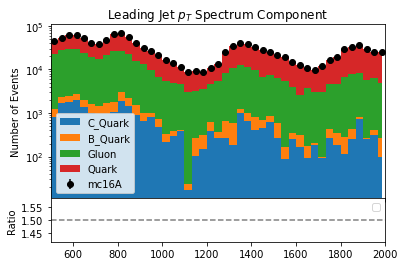

In [26]:
fig, (ax, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [4, 1], 'hspace': 0})
#custom_bins = np.linspace(0, 60, 61)
custom_bins = np.linspace(0, 2000, 61)
pt_bin_centers = 1/2 * (custom_bins[:-1] + custom_bins[1:])


ax.fill_between(pt_bin_centers, 0, Read_HistMap[MC_jet_types[1]], label=  MC_jet_types[1], step = 'mid')
cum_sum = Read_HistMap[MC_jet_types[1]]
#cum_sumD = Read_HistMapD[MC_jet_types[1]]
# # for i in range(1, len(MC_jet_types) - 1):
for i in range(1, len(MC_jet_types) - 1):
    cum_sum_addone = cum_sum + Read_HistMap[MC_jet_types[i+1]]
#    cum_sum_addoneD = cum_sumD + Read_HistMapD[MC_jet_types[i+1]]
    ax.fill_between(pt_bin_centers, cum_sum, cum_sum_addone, label = MC_jet_types[i+1], step='mid')
#    ax.fill_between(pt_bin_centers, cum_sumD, cum_sum_addoneD, label = MC_jet_types[i+1], step='mid')
    cum_sum = cum_sum_addone
#    cum_sumD = cum_sum_addoneD
# ax.fill_between(pt_bin_centers, Read_HistMap, data=["C_Quark", "B_Quark", "Gluon", "Quark"], step = 'mid')

# ax.hist(total, bins =custom_bins,  label = 'Total MC')
ax.errorbar(pt_bin_centers, cum_sum_addone, yerr= np.sqrt(total_error), marker = "o", color = "black", linestyle='', label = "mc16A")
#ax.errorbar(pt_bin_centers, cum_sum_addoneD, yerr= np.sqrt(total_errorD), marker = "^", color = "purple", linestyle='', label = "mc16D")
# ax.scatter(pt_bin_centers, Read_HistMap_Data['Data'], color= "purple", marker= "^", label = "Data")
#ax.errorbar(pt_bin_centers, Read_HistMap_Data['Data'], yerr= np.sqrt(Read_HistMap_Error_Data["Data"]) , color= "purple", linestyle='', marker= "^", label = "Data")



#ax1.stairs(values = cum_sum_addone/  Read_HistMap_Data['Data'], edges=custom_bins, color = "black", linestyle=':', label = 'MC / Data', baseline=None)
#ax1.stairs(values = cum_sum_addone/  cum_sum_addoneD, edges=custom_bins, color = "black", linestyle=':', label = 'MC / Data', baseline=None)
ax1.hlines(y = 1.5, xmin = 500, xmax = 2000, color = 'gray', linestyle = '--')
ax1.set_ylabel("Ratio")
ax.set_yscale('log')
ax.set_xlim(500, 2000)
#ax.set_xlim(0, 60)
ax.set_title( 'Leading Jet $p_{T}$ Spectrum Component')
ax.set_xlabel('Jet $p_{\mathrm{T}}$ [GeV]')
ax.set_ylabel('Number of Events')
ax.legend()
ax1.legend()
fig.show()

In [41]:
cum_sum_addone/  Read_HistMap_Data['Data']

/tmp/ipykernel_521/3446557823.py:1: RuntimeWarning: invalid value encountered in true_divide
  cum_sum_addone/  Read_HistMap_Data['Data']


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       1.13834814, 1.15308052, 1.16058544, 1.17308085, 1.18370566,
       1.19049089, 1.19567797, 1.20180922, 1.20030986, 1.2016786 ,
       1.19849375, 1.21011334, 1.21507685, 1.21109903, 1.21032864,
       1.20617647, 1.22371017, 1.21976316, 1.21995613, 1.22202022,
       1.23560784, 1.21653876, 1.23033387, 1.20699542, 1.21140611,
       1.2108473 , 1.24120673, 1.22470666, 1.2071122 , 1.19725601,
       1.22144166, 1.23238638, 1.22897512, 1.19989426, 1.24204532,
       1.21145948, 1.17096973, 1.20096637, 1.25302928, 1.23463349,
       1.16588069, 1.23616374, 1.20129668, 1.24134264, 1.16197766])

In [15]:
Read_HistMap_Error_Data['Data']

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       6.182330e+05, 1.290354e+06, 1.398204e+06, 1.254234e+06,
       1.042849e+06, 8.405920e+05, 6.688960e+05, 5.255560e+05,
       4.016060e+05, 3.058700e+05, 2.350000e+05, 1.796610e+05,
       1.393610e+05, 1.089910e+05, 8.567600e+04, 6.792900e+04,
       5.332200e+04, 4.284500e+04, 3.437100e+04, 2.755600e+04,
       2.204900e+04, 1.830900e+04, 1.472100e+04, 1.226500e+04,
       1.002500e+04, 8.278000e+03, 6.640000e+03, 5.583000e+03,
       4.683000e+03, 3.922000e+03, 3.219000e+03, 2.657000e+03,
       2.226000e+03, 1.916000e+03, 1.556000e+03, 1.338000e+03,
       1.169000e+03, 9.650000e+02, 7.740000e+02, 6.670000e+02,
       5.990000e+02, 4.780000e+02, 4.170000e+02, 3.440000e+02])

In [16]:
len(Read_HistMap_Data['Data'])

60

In [17]:
# MC event weight in bins 
# sqrt(sum of weights^2 )
total_error

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       9.0638356e+05, 1.6242264e+06, 1.4789541e+06, 1.1240464e+06,
       7.9463356e+05, 5.4969244e+05, 3.8146956e+05, 2.7488484e+05,
       2.0985978e+05, 1.7074141e+05, 1.2999999e+05, 9.1234688e+04,
       6.2114539e+04, 4.1966781e+04, 2.8686082e+04, 1.9817891e+04,
       1.3829109e+04, 9.8262988e+03, 6.9287324e+03, 4.9083643e+03,
       3.5173530e+03, 2.5462363e+03, 1.7685942e+03, 1.1794855e+03,
       7.4490869e+02, 4.5882654e+02, 2.9444080e+02, 2.0276440e+02,
       1.4666528e+02, 1.1095825e+02, 8.3111450e+01, 6.3364258e+01,
       4.8477295e+01, 3.7357788e+01, 2.8648682e+01, 2.1993896e+01,
       1.6656616e+01, 1.2446655e+01, 8.6650391e+00, 5.7578125e+00,
       3.7196045e+00, 2.2219238e+00, 1.4569092e+00, 1.0666504e

In [16]:
np.sqrt(total_error)

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.2959314e+04, 9.4793994e+03, 7.0456963e+03, 5.3175342e+03,
       4.0590767e+03, 3.1445308e+03, 2.4736160e+03, 2.0045317e+03,
       1.7221522e+03, 1.5324821e+03, 1.3331277e+03, 1.1144620e+03,
       9.1844592e+02, 7.5552063e+02, 6.2411951e+02, 5.1901282e+02,
       4.3388748e+02, 3.6351074e+02, 3.0617032e+02, 2.5799603e+02,
       2.1820187e+02, 1.8388963e+02, 1.8162404e+02, 1.2074293e+02,
       9.0104576e+01, 6.3973721e+01, 4.5346249e+01, 3.4625896e+01,
       2.7382441e+01, 2.3785049e+01, 1.9923889e+01, 1.7346077e+01,
       1.5229413e+01, 1.3262601e+01, 1.2012306e+01, 1.0988841e+01,
       1.1405038e+01, 7.5856347e+00, 6.3465734e+00, 5.1352863e+00,
       4.0421429e+00, 3.1485226e+00, 2.4873378e+00, 2.0326755e